# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv') 
df_calls = pd.read_csv('/datasets/megaline_calls.csv') 
df_messages = pd.read_csv('/datasets/megaline_messages.csv') 
df_internet = pd.read_csv('/datasets/megaline_internet.csv') 
df_plans = pd.read_csv('/datasets/megaline_plans.csv') 

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()
df_plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.sample(2)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En forma general no hay valores ausentes y el tipo de datos que muestra si corresponde en cada columna. Segun la la fila mostrada, se observa que todos los datos estan conformes y exactos con la informacion dada al inicio en la Descripcion de los dataframes, pero la columna 'plan_name' deberia cambiarse a tipo de datos categorica, ya que solo hay dos tipos de planes a escoger ahi. Al ser la tabla tarifas deberiamos mostrar a cuanto equivale 1gb, para facilmente crear en un futuro una columna que muestre si cobra o no los 7 dolares en plan ultimate o 10 dolares en plan surf extra. Y posteriormente mostrar el monto total en otra columna.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
df_plans.duplicated().sum()
df_plans['plan_name'].unique()

array(['surf', 'ultimate'], dtype=object)

In [6]:
df_plans['plan_name'] = pd.Categorical(df_plans['plan_name'])
df_plans.dtypes

messages_included           int64
mb_per_month_included       int64
minutes_included            int64
usd_monthly_pay             int64
usd_per_gb                  int64
usd_per_message           float64
usd_per_minute            float64
plan_name                category
dtype: object

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [7]:
df_plans['gb_unit'] = 1024
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_unit
0,50,15360,500,20,10,0.03,0.03,surf,1024
1,1000,30720,3000,70,7,0.01,0.01,ultimate,1024


## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()
df_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [9]:
# Imprime una muestra de datos para usuarios
df_users.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
460,1460,Winford,Underwood,46,"Fresno, CA MSA",2018-05-28,ultimate,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Sobre el tipo de datos que muestra cada columna deberiamos cambiar 'user_id' a object, 'plan' a category y 'reg_date' y 'churn_date' a fecha. En la columna 'churn_date', completar los datos ausentes con 'en uso'. 

Podemos crear una columna categorica por rango de edades para identificar en que grupo tenemos mas clientes. Otra columna seria 'state' para separar cada cliente por estados y ver en que estado tenemos mas clientes. Tambien seria bueno una columna que indique si el usuario esta activo o no activo, de acuerdo a la columna 'churn_date'.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
df_users['user_id'].duplicated().sum()

0

In [11]:
df_users['user_id'] = df_users['user_id'].astype(str)
df_users['plan'] = pd.Categorical(df_users['plan'])
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(1), object(4)
memory usage: 28.1+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [12]:
min_max= df_users['age'].min(),df_users['age'].max()
min_max

(18, 75)

In [13]:
def age_group(age):
    if  18 <= age < 30 :
        return 'joven'
    elif 30 <= age < 40 :
        return 'adulto joven'
    elif 40 <= age < 50 :
        return 'adulto'
    else:
        return 'adulto mayor'

df_users['age_group'] = df_users['age'].apply(age_group)

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_group
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,adulto
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,joven
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,adulto joven
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,adulto mayor
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,adulto


In [14]:
df_users[['city', 'state']] = df_users['city'].str.split(',', expand=True)
df_users['state'] = df_users['state'].str.replace(r'\b(MSA)\b', '', regex=True)

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_group,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,adulto,GA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,joven,WA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,adulto joven,NV
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,adulto mayor,OK
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,adulto,WA


In [15]:
df_users['churn_date'] = df_users['churn_date'].fillna('en uso')

def activation(date):
    if  date == 'en uso' :
        return 'activo'
    else:
        return 'no activo'

df_users['activation'] = df_users['churn_date'].apply(activation)

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_group,state,activation
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,en uso,adulto,GA,activo
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,en uso,joven,WA,activo
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,en uso,adulto joven,NV,activo
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,en uso,adulto mayor,OK,activo
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,en uso,adulto,WA,activo


## Llamadas

In [16]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()
df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [17]:
# Imprime una muestra de datos para las llamadas
df_calls.sample()

,id,user_id,call_date,duration
84322,1311_8,1311,2018-11-15,0.0


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Sobre el tipo de datos que muestra cada columna deberiamos cambiar 'user_id' a object y 'call_date' a fecha. No se observan datos ausentes.
Podemos crear un dataframe que este agrupado por el user_id, y asi ver cuantas llamadas hizo y su duracion total en minutos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
df_calls['id'].duplicated().sum()

0

In [19]:
df_calls['user_id'] = df_calls['user_id'].astype(str)
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
calls_per_user = df_calls.groupby(by='user_id')['id'].count().reset_index()
min_per_user = df_calls.groupby(by='user_id')['duration'].sum().reset_index()
user_calls_min = calls_per_user.merge(min_per_user,on='user_id').rename(columns={"id":"nro_calls"})
user_calls_min.head()

,user_id,nro_calls,duration
0,1000,16,116.83
1,1001,261,1640.46
2,1002,113,777.13
3,1003,149,1041.00
4,1004,370,2618.95


## Mensajes

In [21]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()
df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [22]:
# Imprime una muestra de datos para los mensajes
df_messages.sample()

,id,user_id,message_date
27906,1172_363,1172,2018-11-10


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Sobre el tipo de datos que muestra cada columna deberiamos cambiar 'user_id' a object y 'message_date' a fecha. No se observan datos ausentes.
Podemos crear un dataframe que este agrupado por el user_id, y asi ver cuantos mensajes hizo.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [23]:
df_messages['id'].duplicated().sum()

0

In [24]:
df_messages['user_id'] = df_messages['user_id'].astype(str)
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
messages_per_user = df_messages.groupby(by='user_id')['id'].count().reset_index()
messages_per_user.head()

,user_id,id
0,1000,11
1,1001,207
2,1002,88
3,1003,50
4,1004,177


## Internet

In [26]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()
df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [27]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample()

,id,user_id,session_date,mb_used
103264,1494_146,1494,2018-12-16,0.0


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Sobre el tipo de datos que muestra cada columna deberiamos cambiar 'user_id' a object y 'session_date' a fecha. No se observan datos ausentes.
Podemos crear un dataframe que este agrupado por el user_id, y asi ver cuantos megas ha gastado.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [28]:
df_internet['user_id'] = df_internet['user_id'].astype(str)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [29]:
megas_per_user = df_internet.groupby(by='user_id')['mb_used'].sum().reset_index()
megas_per_user.head()

,user_id,mb_used
0,1000,1901.47
1,1001,80437.94
2,1002,40293.33
3,1003,27044.14
4,1004,156352.81


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [30]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_unit
0,50,15360,500,20,10,0.03,0.03,surf,1024
1,1000,30720,3000,70,7,0.01,0.01,ultimate,1024


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [31]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls['month'] = (df_calls['call_date'].dt.month) #crear una columna solo extrayendo el mes 
nro_user_mes = df_calls.groupby(['user_id','month'])['id'].count().reset_index().rename(columns={"id":"nro_calls"}) 
nro_user_mes.head()

,user_id,month,nro_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [32]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
nro_user_mes_duration = df_calls.groupby(['user_id','month'])['duration'].sum().reset_index().rename(columns={"duration":"used_min"})
nro_user_mes_duration.head()

,user_id,month,used_min
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [33]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_messages['month'] = (df_messages['message_date'].dt.month) #crear una columna solo extrayendo el mes 
mens_user_mes = df_messages.groupby(['user_id','month'])['id'].count().reset_index().rename(columns={"id":"nro_messages"}) 
mens_user_mes.head()

,user_id,month,nro_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [34]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_internet['month'] = (df_internet['session_date'].dt.month) #crear una columna solo extrayendo el mes 
inter_user_mes = df_internet.groupby(['user_id','month'])['mb_used'].sum().reset_index() 
inter_user_mes.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [35]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_merge = pd.merge(nro_user_mes,nro_user_mes_duration, on=['user_id','month'], how='inner')
merge_df = pd.merge(mens_user_mes,inter_user_mes, on=['user_id','month'], how='inner')
df_merge_final = pd.merge(df_merge,merge_df, on=['user_id','month'], how='inner')
df_merge_final.head()

,user_id,month,nro_calls,used_min,nro_messages,mb_used
0,1000,12,16,116.83,11,1901.47
1,1001,8,27,171.14,30,6919.15
2,1001,9,49,297.69,44,13314.82
3,1001,10,65,374.11,53,22330.49
4,1001,11,64,404.59,36,18504.30


In [36]:
# Añade la información de la tarifa
nuevas_columnas = ['user_id','plan']
user_plan = df_users[nuevas_columnas]
user_plan_total = pd.merge(df_merge_final,user_plan, on=['user_id']).rename(columns={"plan":"plan_name"})
user_plan_total.head()

,user_id,month,nro_calls,used_min,nro_messages,mb_used,plan_name
0,1000,12,16,116.83,11,1901.47,ultimate
1,1001,8,27,171.14,30,6919.15,surf
2,1001,9,49,297.69,44,13314.82,surf
3,1001,10,65,374.11,53,22330.49,surf
4,1001,11,64,404.59,36,18504.30,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [37]:
ingreso_mensual = pd.merge(user_plan_total,df_plans, on=['plan_name'])

#Hallar el cargo extra de gb para cada ususario
def excess(row):
    if row['mb_used'] > row['mb_per_month_included']:
        return row['mb_used'] - row['mb_per_month_included']
    else:
        return 0

ingreso_mensual['excess_mb'] = ingreso_mensual.apply(excess, axis=1)
ingreso_mensual['excess_gb'] = (ingreso_mensual['excess_mb'] / ingreso_mensual['gb_unit']).apply(math.ceil)
ingreso_mensual['extra_charge_gb'] = ingreso_mensual['excess_gb'] * ingreso_mensual['usd_per_gb']
ingreso_mensual.sample(5)

,user_id,month,nro_calls,used_min,nro_messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_unit,excess_mb,excess_gb,extra_charge_gb
914,1141,11,106,762.94,15,17335.74,surf,50,15360,500,20,10,0.03,0.03,1024,1975.74,2,20
721,1075,11,22,111.28,64,8632.35,surf,50,15360,500,20,10,0.03,0.03,1024,0.00,0,0
1426,1336,5,92,554.97,88,16958.73,surf,50,15360,500,20,10,0.03,0.03,1024,1598.73,2,20
650,1052,11,27,197.32,52,4650.40,surf,50,15360,500,20,10,0.03,0.03,1024,0.00,0,0
1652,1439,5,46,275.12,55,13808.46,surf,50,15360,500,20,10,0.03,0.03,1024,0.00,0,0


In [38]:
#Hallar el cargo extra de llamadas para cada ususario
def minutes(row):
    if row['used_min'] > row['minutes_included']:
        return row['used_min'] - row['minutes_included']
    else:
        return 0
    
ingreso_mensual['excess_min'] = ingreso_mensual.apply(minutes, axis=1).apply(math.ceil)
ingreso_mensual['extra_charge_min'] = ingreso_mensual['excess_min'] * ingreso_mensual['usd_per_minute']

ingreso_mensual.iloc[1096:1098] 


,user_id,month,nro_calls,used_min,nro_messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_unit,excess_mb,excess_gb,extra_charge_gb,excess_min,extra_charge_min
1096,1215,10,123,847.52,96,30940.87,surf,50,15360,500,20,10,0.03,0.03,1024,15580.87,16,160,348,10.44
1097,1215,11,95,660.73,92,35029.93,surf,50,15360,500,20,10,0.03,0.03,1024,19669.93,20,200,161,4.83


In [39]:
#Hallar el cargo extra de mensajes para cada ususario
def messages(row):
    if row['nro_messages'] > row['messages_included']:
        return row['nro_messages'] - row['messages_included']
    else:
        return 0
    
ingreso_mensual['excess_messages'] = ingreso_mensual.apply(messages, axis=1)
ingreso_mensual['extra_charge_messages'] = ingreso_mensual['excess_messages'] * ingreso_mensual['usd_per_message']

ingreso_mensual.iloc[1096:1098] 


,user_id,month,nro_calls,used_min,nro_messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,gb_unit,excess_mb,excess_gb,extra_charge_gb,excess_min,extra_charge_min,excess_messages,extra_charge_messages
1096,1215,10,123,847.52,96,30940.87,surf,50,15360,500,...,0.03,0.03,1024,15580.87,16,160,348,10.44,46,1.38
1097,1215,11,95,660.73,92,35029.93,surf,50,15360,500,...,0.03,0.03,1024,19669.93,20,200,161,4.83,42,1.26


In [40]:
# Calcula el ingreso mensual para cada usuario
ingreso_mensual['total_charge'] = ingreso_mensual['extra_charge_gb']+ingreso_mensual['extra_charge_min']+ingreso_mensual['extra_charge_messages']+ingreso_mensual['usd_monthly_pay']
nuevas_columnas = ['user_id','month','total_charge']
ingreso_mensual_user = ingreso_mensual[nuevas_columnas]
ingreso_mensual_user 

,user_id,month,total_charge
0,1000,12,70.0
1,1006,11,70.0
2,1006,12,84.0
3,1008,10,70.0
4,1008,11,70.0
...,...,...,...
1754,1496,8,20.0
1755,1496,9,40.0
1756,1496,10,20.0
1757,1496,11,20.0


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [41]:
# Compara la duración promedio de llamadas por cada plan y por cada mes.
calls_plan_mes = pd.merge(user_plan,nro_user_mes_duration, on=['user_id'])
prom_calls_plan_mes = calls_plan_mes.groupby(['month', 'plan'])['used_min'].mean().reset_index()
prom_calls_plan_mes

,month,plan,used_min
0,1,surf,192.840000
1,1,ultimate,183.162500
2,2,surf,280.851111
3,2,ultimate,443.171667
4,3,surf,310.970000
5,3,ultimate,285.701667
6,4,surf,332.380000
7,4,ultimate,316.508095
8,5,surf,387.108000
9,5,ultimate,383.664828


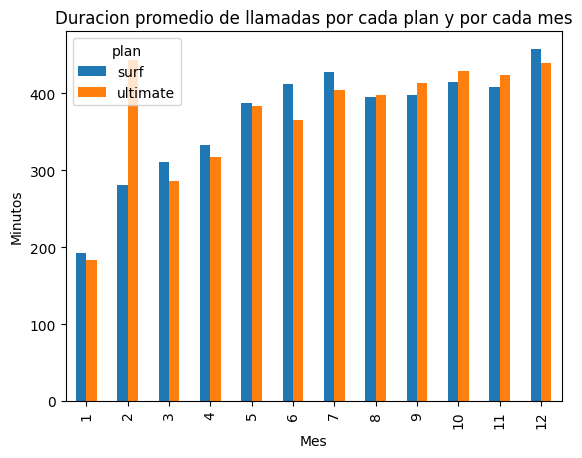

In [42]:
#Traza un gráfico de barras para visualizarla.
prom_calls_plan_mes_bar = prom_calls_plan_mes.pivot_table(columns='plan', index='month', values='used_min')
prom_calls_plan_mes_bar.plot(kind='bar',
                             title='Duracion promedio de llamadas por cada plan y por cada mes',
                             xlabel="Mes",
                             ylabel="Minutos")
plt.show()

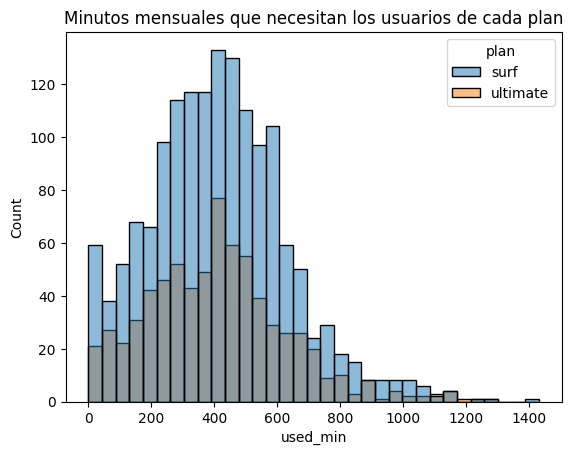

In [43]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. 
#Traza un histograma
sns.histplot(calls_plan_mes, x='used_min',hue='plan')
plt.title('Minutos mensuales que necesitan los usuarios de cada plan')
plt.show()

[Calcula la media y la varianza de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

La media es el valor central, el cual se muestra por mes y por plan en 'used_min_mean'. 
La varianza nos indica la dispersion de los datos, medida de distancia en relacion a la media, sin embargo para una mejor interpretacion deberiamos sacar la desviacion estandar.
Con la desviacion estandar vemos por jemplo que:
- En la fila 0, cada dato se aleja 121 minutos en promedio de la media 192. Al obtener el coeficiente de variacion 192/121 es 0.63.
- En la fila 3, cada dato se aleja 220 minutos en promedio de la media 443. Al obtener el coeficiente de variacion 192/121 es 0.49.

Si el coeficiente de variacion es cerca a 1 nos indica que los datos estan muy dispersos, siendo heterogeneos.
Y si es menor a 1 como 0.5, 0.3 entonces los datos son homogeneos.

In [44]:
# Calcula la media y la varianaza de la duración mensual de llamadas.
calls_mean = prom_calls_plan_mes.rename(columns={"used_min":"used_min_mean"})
var_calls_plan_mes = calls_plan_mes.groupby(['month', 'plan'])['used_min'].var().reset_index()
calls_var = var_calls_plan_mes.rename(columns={"used_min":"used_min_var"})
merge_mean_var = pd.merge(calls_mean, calls_var, on=['month','plan'])
var_calls_plan_mes = calls_plan_mes.groupby(['month', 'plan'])['used_min'].std().reset_index()
calls_std = var_calls_plan_mes.rename(columns={"used_min":"used_min_std"})
merge_mean_var_std = pd.merge(merge_mean_var, calls_std, on=['month','plan'])
merge_mean_var_std.head()

,month,plan,used_min_mean,used_min_var,used_min_std
0,1,surf,192.840000,14795.440200,121.636508
1,1,ultimate,183.162500,14991.369958,122.439250
2,2,surf,280.851111,46959.219961,216.700761
3,2,ultimate,443.171667,48579.581537,220.407762
4,3,surf,310.970000,31821.317991,178.385308


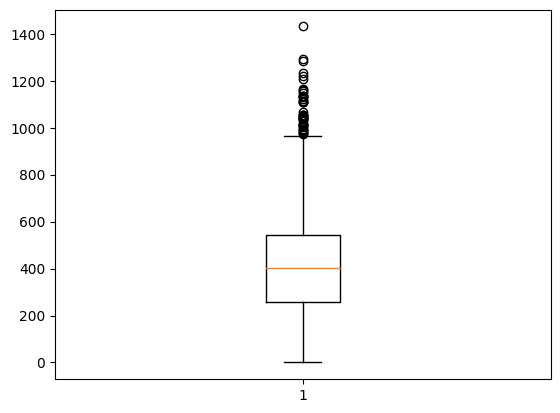

In [45]:
#Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.boxplot(nro_user_mes_duration['used_min'])
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

En el grafico de barras vemos la duracion promedio de llamadas por cada plan y por cada mes.
- A inicios del año hasta julio, los usuarios del plan surf suelen usar más minutos, con la unica excepción de febrero, donde el uso de minutos es mucho mayor en el plan ultimate.
- A partir de agosto los usuarios del plan ultimate son los que suelen usar mas minutos en comparacion a los del plan surf, con una ligera diferencia.
- Vemos que en promedio los clientes del plan surf usan todos sus minutos incluidos (500) y los clientes del plan ultimate usan mucho menos sus minutos incluidos (3000)

En el histograma comparamos el número de minutos mensuales que necesitan los usuarios de cada plan. 
- A simple vista se observa que hay mas usuarios del plan surf que usan sus minutos, comparados al del plan ultimate, que son casi la mitad de la cantidad usuarios del plan surf. 
- Vemos que en el plan ultimate hay alrededor de 80 usuarios que usan entre 400 y 500 minutos mensuales y 130 usuarios en el plan surf.
- En datos generales, se observa que en ambos planes la mayoria de usuarios suele gastar entre 210 y 570 minutos al mes.

En el diagrama de caja visualizamos la distribución de la duración mensual de llamadas, donde vemos los  minutos que usan los usuarios en un mes.
- Hay un solo usuario que uso unos 1400 minutos.
- Los usuarios que usan mas de 1000 son outlayers, un valor atipico.
- La media es 400 minutos. 

¿Su comportamiento varía en función del plan?
- No varía, los usuarios mantienen la cantidad de minutos usados dentro de los minutos incluidos en su respectivo plan.

### Mensajes

In [46]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messag_plan_mes = pd.merge(user_plan,mens_user_mes, on=['user_id'])
nro_messag_plan_mes = messag_plan_mes.groupby(['month', 'plan'])['nro_messages'].mean().reset_index()
nro_messag_plan_mes.head()

,month,plan,nro_messages
0,1,surf,21.000000
1,1,ultimate,20.666667
2,2,surf,21.600000
3,2,ultimate,25.166667
4,3,surf,21.937500


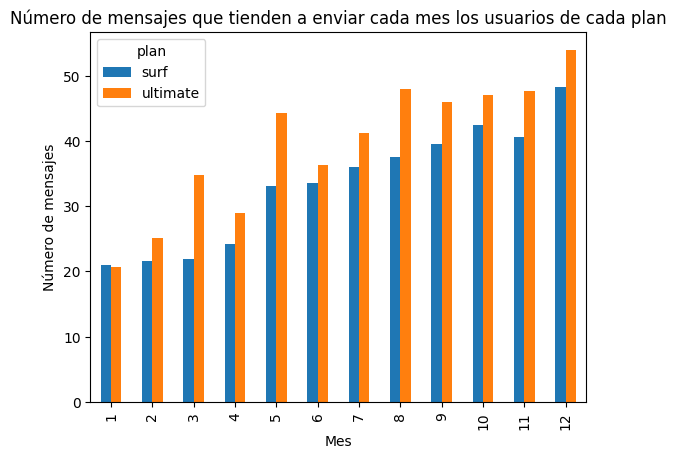

In [47]:
#Traza un gráfico de barras para visualizarla.
nro_messag_plan_mes_bar = nro_messag_plan_mes.pivot_table(columns='plan', index='month', values='nro_messages')
nro_messag_plan_mes_bar.plot(kind='bar',
                             title='Número de mensajes que tienden a enviar cada mes los usuarios de cada plan',
                             xlabel="Mes",
                             ylabel="Número de mensajes")
plt.show()

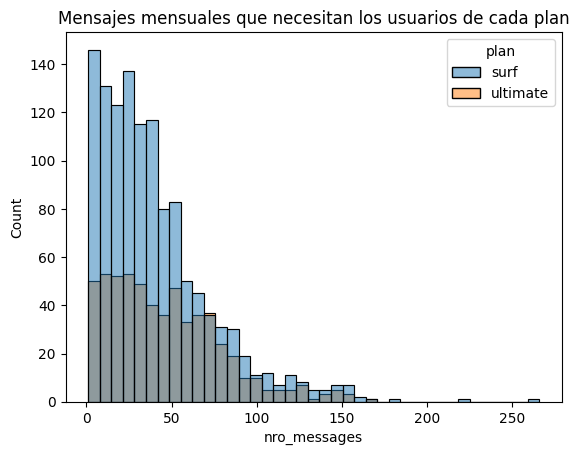

In [48]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. 
#Traza un histograma
sns.histplot(messag_plan_mes, x='nro_messages',hue='plan')
plt.title('Mensajes mensuales que necesitan los usuarios de cada plan')
plt.show()

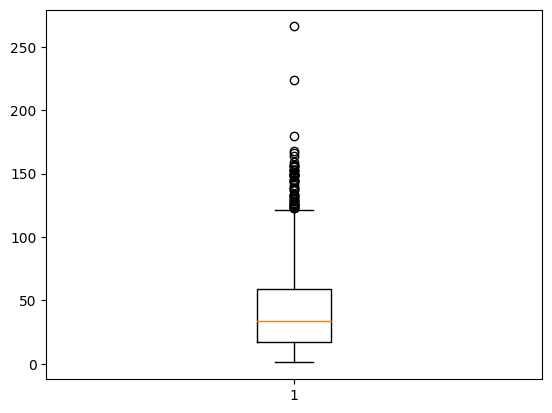

In [49]:
#Traza un diagrama de caja para visualizar la distribución mensual de mensajes
plt.boxplot(mens_user_mes['nro_messages'])
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

En el grafico de barras vemos el promedio de mensajes que tienden a enviar los usuarios por cada plan y por cada mes.
- De forma general vemos que los usuarios del plan ultimate tienden a enviar mas mensajes que los usuarios del plan surf y esta diferencia no es mayor a 10 mensajes.
- En los meses de marzo, mayo y agosto es donde la diferencia de mensajes es notoria, en los demas meses la diferencia es tenue.
- Solo en el mes de enero los usuarios de surf enviaron mas mensajes que los de ultima, con una minima diferencia.
- Los usuarios del plan ultimate usan mensajes muy por debajo de las cantidades incluidas en su plan, y los del plan surf si usan casi todos los mensajes que incluye su plan.

En el histograma comparamos el número de mensajes mensuales que necesitan los usuarios de cada plan. 
- A simple vista se observa que hay mas usuarios del plan surf que usan sus mensajes, comparados al del plan ultimate, que son casi menos de la mitad de la cantidad de usuarios del plan surf. 
- Vemos que en el plan ultimate hay alrededor de 50 usuarios que usan entre 0 y 50 mensajes mensuales y 120 usuarios en el plan surf que usan entre 0 y 40 mensajes mensuales.
- En datos generales, se observa que en ambos planes la mayoria de usuarios suele gastar entre 0 y 50 mensajes al mes.

En el diagrama de caja visualizamos la distribución mensual de los mensajes.
- Hay un solo usuario que uso mas de 250 mensajes, otro uso 230 y otro 180, siendo los outlayers mas notorios.
- Los usuarios que usan mas de 120 mensajes son outlayers, valores atipicos.
- Visualmente se aprecia que la media es 35 mensajes. 

¿Su comportamiento varía en función del plan?
- No varía, los usuarios mantienen la cantidad de mensajes usados dentro de la cantidad incluida en su respectivo plan.

### Internet

In [50]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan por mes
inter_plan_mes = pd.merge(user_plan,inter_user_mes, on=['user_id'])
traf_inter_plan_mes = inter_plan_mes.groupby(['month', 'plan'])['mb_used'].mean().reset_index()
traf_inter_plan_mes['gb_used'] = traf_inter_plan_mes['mb_used'] / 1024
traf_inter_plan_mes.head()

,month,plan,mb_used,gb_used
0,1,surf,4874.860000,4.760605
1,1,ultimate,6918.092500,6.755950
2,2,surf,12178.843333,11.893402
3,2,ultimate,17128.808571,16.727352
4,3,surf,13345.440000,13.032656


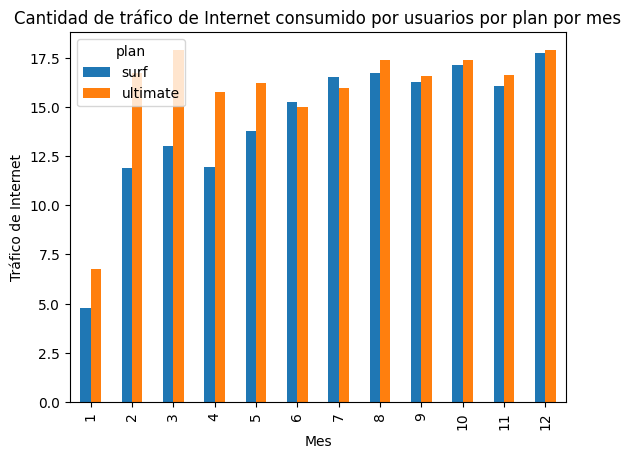

In [51]:
#Traza un gráfico de barras para visualizarla.
traf_inter_plan_mes_bar = traf_inter_plan_mes.pivot_table(columns='plan', index='month', values='gb_used')
traf_inter_plan_mes_bar.plot(kind='bar',
                             title='Cantidad de tráfico de Internet consumido por usuarios por plan por mes',
                             xlabel="Mes",
                             ylabel="Tráfico de Internet")
plt.show()

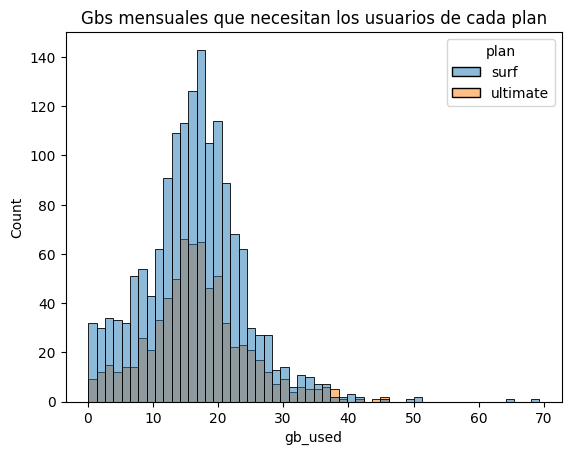

In [52]:
# Compara el número de gb mensuales que necesitan los usuarios de cada plan. 
#Traza un histograma
inter_plan_mes['gb_used'] = inter_plan_mes['mb_used'] / 1024
sns.histplot(inter_plan_mes, x='gb_used',hue='plan')
plt.title('Gbs mensuales que necesitan los usuarios de cada plan')
plt.show()

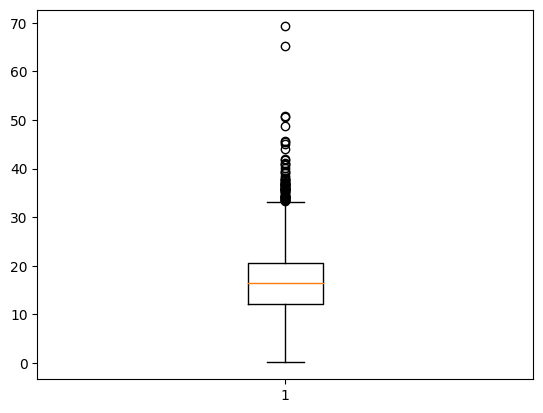

In [53]:
#Traza un diagrama de caja para visualizar la distribución mensual del tráfico de Internet por Gb
inter_user_mes['gb_used'] = inter_user_mes['mb_used'] / 1024
plt.boxplot(inter_user_mes['gb_used'])
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]


En el grafico de barras vemos el promedio de gbs cosumidos por cada plan y por cada mes.
- A inicios del año hasta mayo, los usuarios del plan ultimate usan más gbs que los del plan surf, hubiendo una diferencia entre 2 y 5 gbs.
- A partir del mes de junio los usuarios del plan surf tienden a aumentar el consumo de gbs llegando muy cerca a los del plan ultimate, con una ligera diferencia.
- Vemos que en promedio los clientes del plan ultimate usan todos sus gbs incluidos (30) y los clientes del plan surf suelen pasarse un poco de su limite de gbs incluidos (15) desde el mes de julio.

En el histograma comparamos el número de gbs mensuales que necesitan los usuarios de cada plan. 
- A simple vista se observa que hay mas usuarios del plan surf que usan sus gbs, comparados al del plan ultimate, que son casi la mitad de la cantidad de usuarios del plan surf. 
- Vemos que en el plan ultimate hay alrededor de 60 usuarios que usan entre 15 y 18 gb mensuales y 140 usuarios en el plan surf que usan 17gb. Siendo la mayor cantidad de usuarios que usan esa cantidad de gb.
- En datos generales, se observa que en ambos planes la mayoria de usuarios suele gastar entre 12 y 23 gb al mes en el plan surf, y entre 15 y 18gb en el plan ultimate.

En el diagrama de caja visualizamos la distribución de gbs que usan los usuarios en un mes.
- Hay solo dos usuarios que usaron 65 y 70 gbs.
- Los usuarios que usan mas de 35gbs son outlayers, un valor atipico.
- La media es 15gbs. 

¿Su comportamiento varía en función del plan?
- Los usuarios del plan ultimate si se mantienen en su limite de gbs incluidos, pero los usuarios del plan surf tienden a consumir mas de su limite.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [54]:
# Describe los ingresos de los planes por mes
ingreso_plan_mes = pd.merge(user_plan,ingreso_mensual_user, on=['user_id'])
ingreso_plan_mes_sum = ingreso_plan_mes.groupby(['month', 'plan'])['total_charge'].sum().reset_index()
ingreso_plan_mes_sum.head()

,month,plan,total_charge
0,1,surf,20.00
1,1,ultimate,210.00
2,2,surf,118.34
3,2,ultimate,350.00
4,3,surf,613.23


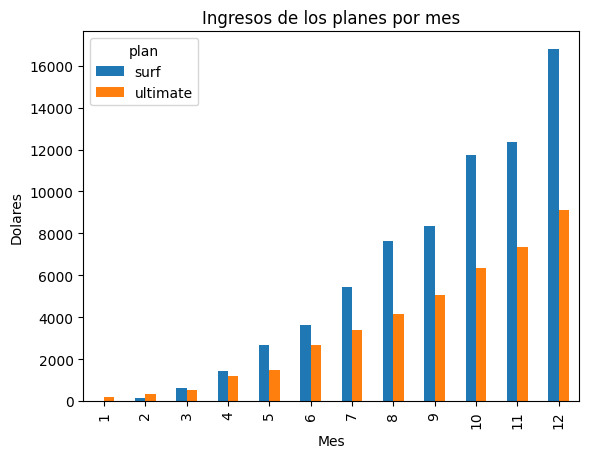

In [55]:
#Traza un gráfico de barras para visualizarla.
ingreso_plan_mes_sum_bar = ingreso_plan_mes_sum.pivot_table(columns='plan', index='month', values='total_charge')
ingreso_plan_mes_sum_bar.plot(kind='bar',
                             title='Ingresos de los planes por mes',
                             xlabel="Mes",
                             ylabel="Dolares")
plt.show()

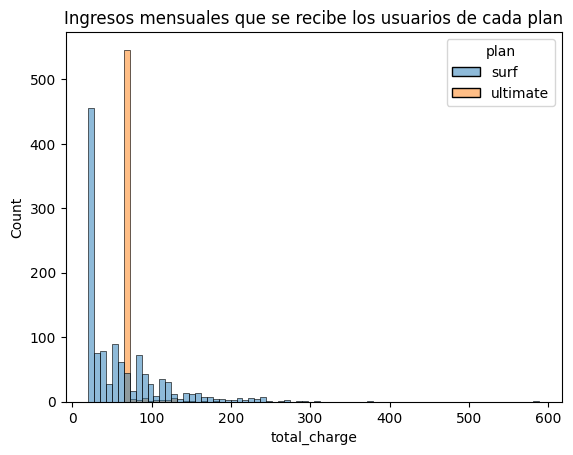

In [56]:
# Compara el número de ingresos mensuales que se recibe los usuarios de cada plan. 
#Traza un histograma
sns.histplot(ingreso_plan_mes, x='total_charge',hue='plan')
plt.title('Ingresos mensuales que se recibe los usuarios de cada plan')
plt.show()

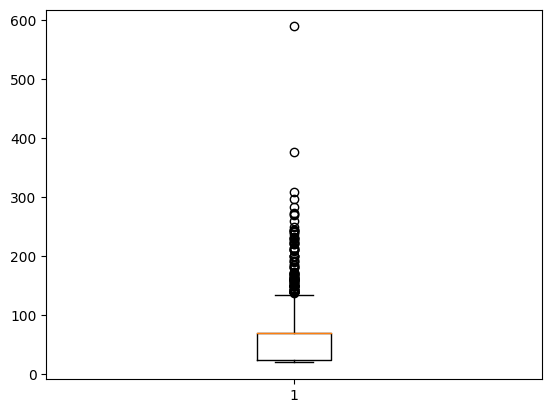

In [57]:
#Traza un diagrama de caja para visualizar la distribución mensual de los ingresos
plt.boxplot(ingreso_mensual_user['total_charge'])
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

En el grafico de barras vemos el ingreso de los planes por mes.
- Solo en enero y febrero hubieron mas ingresos en el plan ultimate.
- A partir de marzo los ingresos en el plan surf fueron aumentando cada mes, creando un diferencial de ingresos con el plan ultimate,  habiendo un crecimiento exponencial en cada mes.

En el histograma comparamos los ngresos mensuales que se reciben de los usuarios de cada plan.
- Se recibe 20 dolares mensuales de 460 usuarios (plan surf).
- Se recibe 70 dolares mensuales de 550 usuarios (plan ultimate). 
- Se reciben otros montos de ingresos en su mayoria del plan surf.

En el diagrama de caja visualizamos la distribución mensual de los ingresos.
- Se recibe como 600 dolares de un solo usuario, un valor muy atipico.
- Los ingresos mayores a 130 dolares por usuario son outlayers, valores atipicos.
- La media de ingresos es alrededor de los 80 dolares. 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [67]:
ingresos_planes = pd.merge(ingreso_mensual_user,df_users, on=['user_id'])
resultado_ultimate = ingresos_planes.query('plan == "ultimate"')['total_charge']
resultado_surf = ingresos_planes.query('plan == "surf"')['total_charge']

In [72]:
resultado_ultimate

0      70.0
1      70.0
2      84.0
3      70.0
4      70.0
       ... 
574    70.0
575    70.0
576    70.0
577    70.0
578    70.0
Name: total_charge, Length: 579, dtype: float64

In [60]:
#Hallamos las varianzas para determinar equal_var
resultado_ultimate.var()

121.75810818079135

In [61]:
resultado_surf.var()

2855.9467261346877

In [62]:
# Prueba las hipótesis
results_plans = st.ttest_ind(resultado_ultimate,resultado_surf,equal_var=False)
results_plans

alpha = 0.05, # es el valor estandar x eso se escogio

#los ingresos promedios son diferentes. 
#h. nula = los ingresos son iguales
#h. alternativa = los ingresos son diferentes

if results_plans.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula


- Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son diferentes. 

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [63]:
NY_NJ = ingresos_planes[ingresos_planes['state'].str.contains('NJ', 'NY')]
resultado_NY_NJ = NY_NJ['total_charge']
resultado_others = ingresos_planes[~ingresos_planes['state'].str.contains('NJ', 'NY')]['total_charge']

In [64]:
#Hallamos las varianzas para determinar equal_var
resultado_NY_NJ.var()

1820.7131608935656

In [65]:
resultado_others.var()

2025.9009905850082

In [66]:
# Prueba las hipótesis
results_states = st.ttest_ind(resultado_NY_NJ,resultado_others,equal_var=False)
results_states

alpha = 0.05, # es el valor estandar x eso se escogio

#los ingresos promedios son diferentes. 
#h. nula = los ingresos son iguales
#h. alternativa = los ingresos son diferentes

if results_states.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

No podemos rechazar la hipótesis nula


- El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

En general el comportamiento de la clientela se caracteriza de la siguiente manera:
- En ambos planes respecto a las llamadas, usan solo los minutos incluidos en su paquete.
- Los usuarios de ambos planes usan mensajes por debajo de las cantidades incluidas en su plan.
- Respecto al trafico de internet, los usuarios del plan ultimate si usan los gbs incluidos en su plan, a veces incluso menos; pero los usuarios del plan surf tienden a gastar mas gbs de los que incluye su plan.

Sobre los ingresos en los planes vemos que:
- Si solo hablamos del costo fijo de los planes, definitavemente hay mas ingresos por los usuarios del plan ultimate, ya que la cantidad de usuarios es mayor al del plan surf asi como el costo.
- Sin embargo, al observar los ingresos por cargos extras, estos se obtienen en su gran mayoria de los usuarios del plan surf.

Prueba de hipótesis
- El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
- El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey no es diferente al de los usuarios de otras regiones.